C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\1717156905.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\1717156905.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\1717156905.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 *

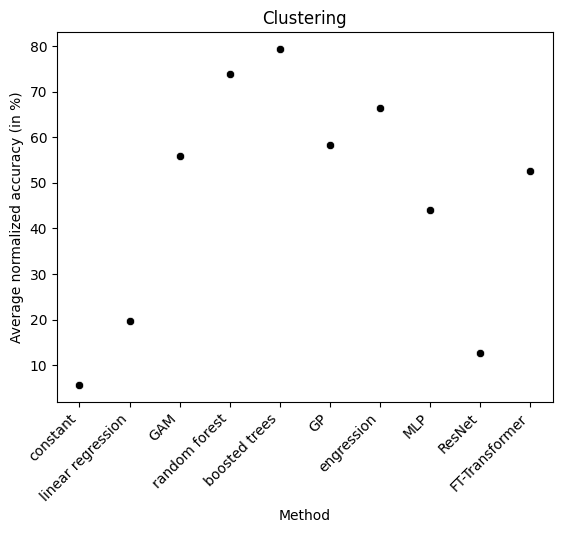

In [19]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import numpy as np

directory = r'RESULTS/CLUSTERING'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_clustering_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        rmse = table['RMSE']
        second_largest = sorted(rmse, reverse=True)[1]
        rmse[rmse > 5 * second_largest] = np.nan
        lowest_rmse = rmse.min()
        mid_rmse = sorted(rmse, reverse=True)[2]
        df[task_name] = ((mid_rmse - rmse) / (mid_rmse - lowest_rmse)).clip(0, 1)
        

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Clustering')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/clustering_RMSE_only_num_features_normalized_accuracy.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\1455742037.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\1455742037.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\1455742037.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 *

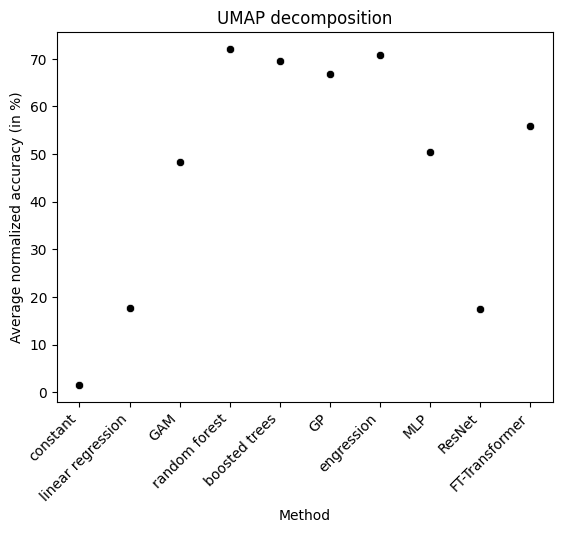

In [20]:
import os
import pandas as pd

directory = r'RESULTS/UMAP_DECOMPOSITION'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_umap_decomposition_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        rmse = table['RMSE']
        second_largest = sorted(rmse, reverse=True)[1]
        rmse[rmse > 5 * second_largest] = np.nan
        lowest_rmse = rmse.min()
        mid_rmse = sorted(rmse, reverse=True)[2]
        df[task_name] = ((mid_rmse - rmse) / (mid_rmse - lowest_rmse)).clip(0, 1)
        

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('UMAP decomposition')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/umap_decomposition_RMSE_only_num_features_normalized_accuracy.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\3256189066.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\3256189066.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\3256189066.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 *

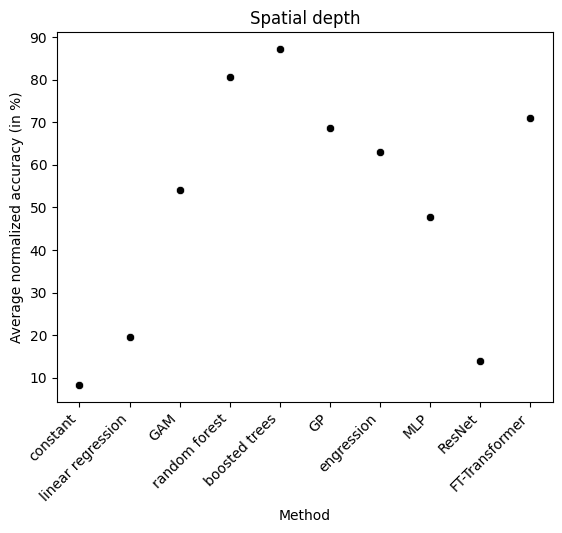

In [21]:
import os
import pandas as pd

directory = r'RESULTS/SPATIAL_DEPTH'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_spatial_depth_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        rmse = table['RMSE']
        second_largest = sorted(rmse, reverse=True)[1]
        rmse[rmse > 5 * second_largest] = np.nan
        lowest_rmse = rmse.min()
        mid_rmse = sorted(rmse, reverse=True)[2]
        df[task_name] = ((mid_rmse - rmse) / (mid_rmse - lowest_rmse)).clip(0, 1)
        

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Spatial depth')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/spatial_depth_RMSE_only_num_features_normalized_accuracy.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\4001332018.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\4001332018.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\4001332018.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 *

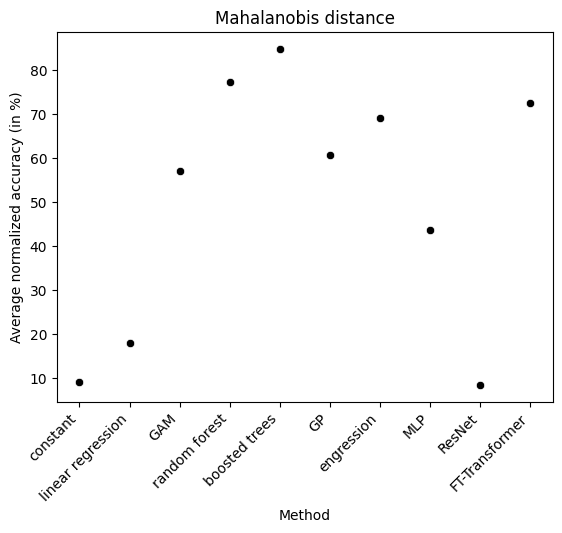

In [22]:
import os
import pandas as pd

directory = r'RESULTS/MAHALANOBIS'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_mahalanobis_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        rmse = table['RMSE']
        second_largest = sorted(rmse, reverse=True)[1]
        rmse[rmse > 5 * second_largest] = np.nan
        lowest_rmse = rmse.min()
        mid_rmse = sorted(rmse, reverse=True)[2]
        df[task_name] = ((mid_rmse - rmse) / (mid_rmse - lowest_rmse)).clip(0, 1)
        

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Mahalanobis distance')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/mahalanobis_RMSE_only_num_features_normalized_accuracy.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\914844315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\914844315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_24908\914844315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * se

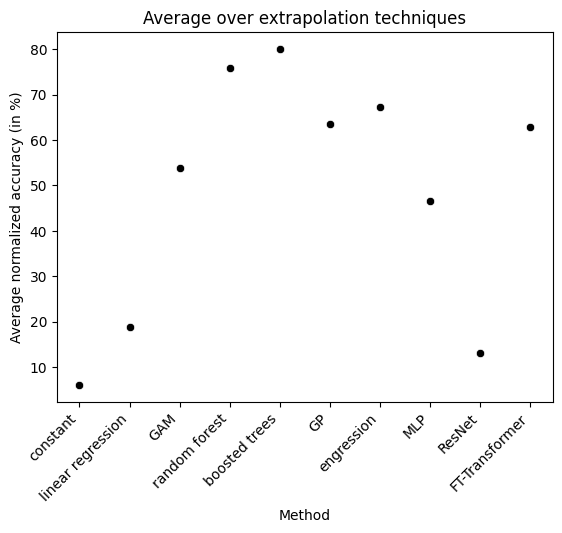

In [28]:
# Plotting the average test accuracy for all extrapolation methods
import os
import pandas as pd
import seaborn as sns

list_directories = [r'RESULTS/CLUSTERING', r'RESULTS/UMAP_DECOMPOSITION', r'RESULTS/SPATIAL_DEPTH', r'RESULTS/MAHALANOBIS']
df = pd.DataFrame()

for directory in list_directories:
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            task_name = filename
            filepath = os.path.join(directory, filename)
            table = pd.read_csv(filepath) 
            rmse = table['RMSE']
            second_largest = sorted(rmse, reverse=True)[1]
            rmse[rmse > 5 * second_largest] = np.nan
            lowest_rmse = rmse.min()
            mid_rmse = sorted(rmse, reverse=True)[2]
            df[task_name] = ((mid_rmse - rmse) / (mid_rmse - lowest_rmse)).clip(0, 1)
        

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Average over extrapolation techniques')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/average_over_extrapolation_techniques_RMSE_only_num_features_normalized_accuracy.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

In [27]:
result_df

,Method,Mean,Median,Standard Deviation
0,constant,6.097581,0.000000,0.196813
6,linear regression,18.761364,0.000000,0.272552
8,GAM,53.773804,0.576247,0.366746
5,random forest,75.919074,0.868682,0.295446
4,boosted trees,80.024077,0.929535,0.271828
9,GP,63.593290,0.729449,0.327275
7,engression,67.365238,0.763433,0.337531
1,MLP,46.491950,0.495705,0.398342
2,ResNet,13.169227,0.000000,0.228110
3,FT-Transformer,62.802795,0.817258,0.379842


In [29]:
result_df

,Method,Mean,Median,Standard Deviation
0,constant,6.097581,0.000000,0.196813
6,linear regression,18.761364,0.000000,0.272552
8,GAM,53.773804,0.576247,0.366746
5,random forest,75.919074,0.868682,0.295446
4,boosted trees,80.024077,0.929535,0.271828
9,GP,63.593290,0.729449,0.327275
7,engression,67.365238,0.763433,0.337531
1,MLP,46.491950,0.495705,0.398342
2,ResNet,13.169227,0.000000,0.228110
3,FT-Transformer,62.802795,0.817258,0.379842
